In [1]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [2]:
transactions = pd.concat(
    [pd.read_csv('2014.csv'), pd.read_csv('2015.csv')]
)
transactions.head()

,Date,Store_Number,Transaction_Count,Target_PCT,Met_Target,Bonus_Payable,Month,DayOfWeek
0,2014-01-01,25,840,0.3360,False,0,1,2
1,2014-01-01,36,487,0.1948,False,0,1,2
2,2014-01-02,1,1875,0.7500,False,0,1,3
3,2014-01-02,2,2122,0.8488,False,0,1,3
4,2014-01-02,3,3350,1.3400,True,100,1,3


In [3]:
transactions.tail()

,Date,Store_Number,Transaction_Count,Target_PCT,Met_Target,Bonus_Payable,Month,DayOfWeek
18341,2015-12-31,49,3828,1.5312,True,100,12,3
18342,2015-12-31,50,2948,1.1792,True,100,12,3
18343,2015-12-31,51,2892,1.1568,True,100,12,3
18344,2015-12-31,53,2300,0.9200,False,0,12,3
18345,2015-12-31,54,1572,0.6288,False,0,12,3


# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [4]:
retail = pd.read_csv('retail.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [5]:
stores = pd.read_csv('stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
merged_df = retail.merge(stores,
                         how='left',
                         left_on='store_nbr',
                         right_on='store_nbr'
                        ).astype({'id':'int32',
                                  'store_nbr':'int8',
                                  'sales':'int32',
                                  'onpromotion':'int8',
                                  'cluster':'int8',
                                  'state':'category'
                                 })
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0,0,Quito,Pichincha,D,13


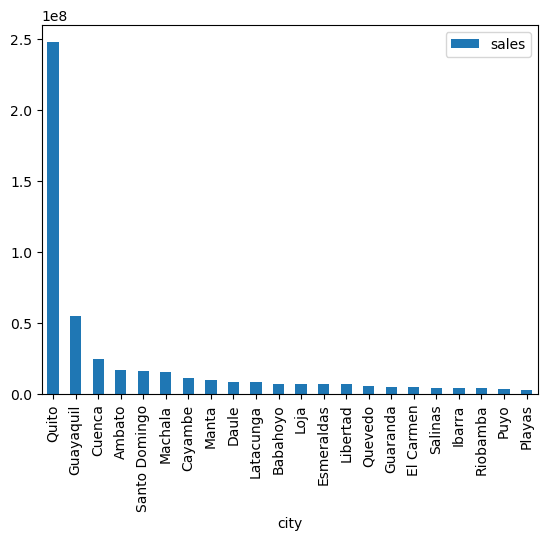

In [26]:
merged_df.groupby('city').agg({'sales':'sum'}).sort_values(by='sales', ascending=False).plot.bar();

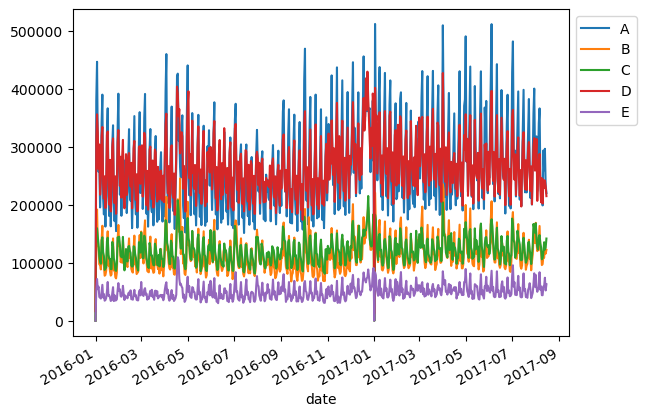

In [33]:
merged_df.pivot_table(index='date', columns='type', values='sales', aggfunc='sum').plot().legend(bbox_to_anchor=(1,1));

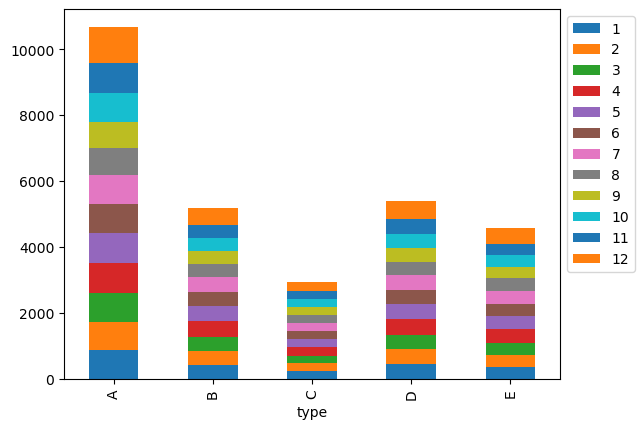

In [43]:
month=merged_df['date'].dt.month
(merged_df.pivot_table(index='type', columns=month, values='sales', aggfunc='mean')
 .plot.bar(stacked=True)
 .legend(bbox_to_anchor=(1,1))
);